## IMPORTING THE PYTHON PACKAGES 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt  
from warnings import filterwarnings
filterwarnings('ignore')

## OPENING THE DATASET

In [2]:
ds = xr.open_dataset('Africa_cru_data.nc')
print(ds)  

# Selecting the precipitation data
Precip = ds.pre  

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk


## Select the time range and region for Ghana

In [3]:
ghana_data = Precip.sel(time=slice('2001', '2010'), lat=slice(4.5, 11.5), lon=slice(-3.5, 1.5))

## Selecting precipitation values > 250 mm and compute the mean for each year

In [4]:
annual_precipitation = ghana_data.where(ghana_data> 250).groupby('time.year').mean(dim='time')

## USING CARTOPY FOR MAPPING 

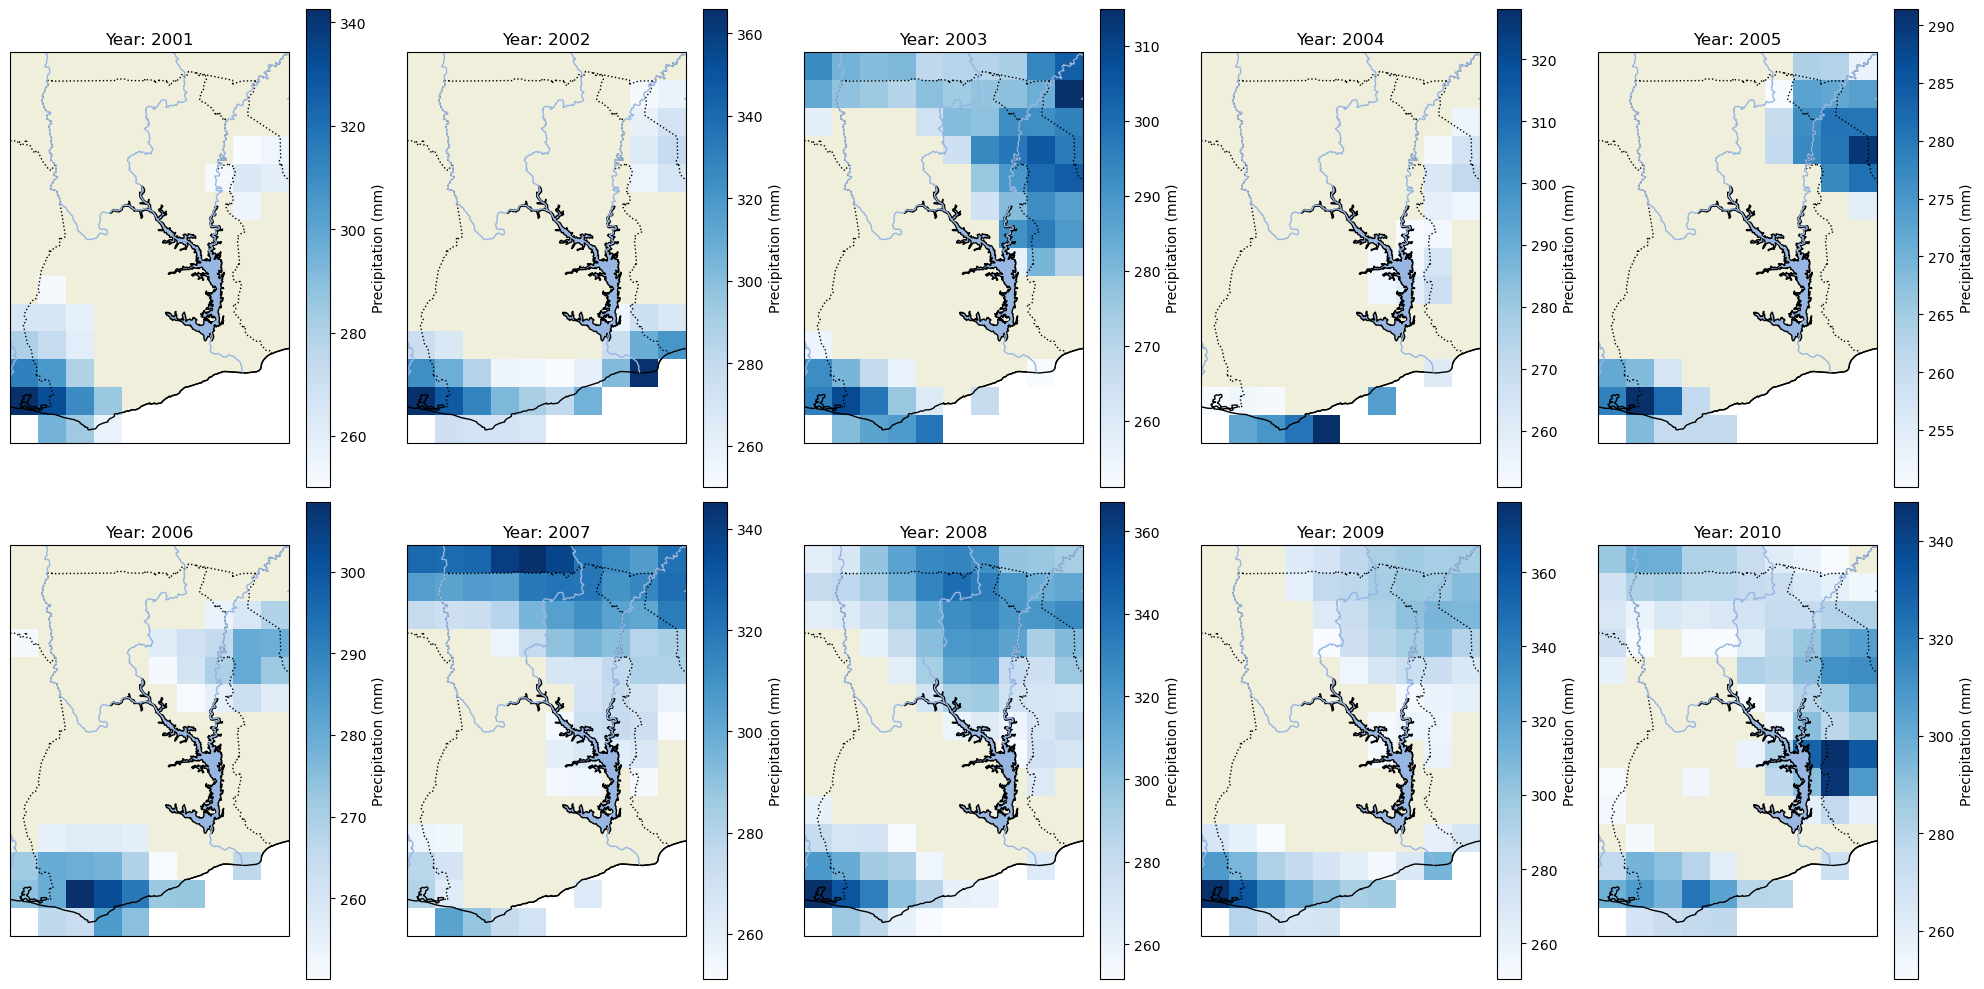

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure for plotting
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

# Loop through each year and plot
for i, year in enumerate(range(2001, 2011)):  # Adjusted to include 2010
    ax = axes[i]
    
    # Select the annual precipitation for the specific year
    annual_precip = annual_precipitation.sel(year=year)  
    annual_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'label': 'Precipitation (mm)'})
    
    ax.set_title(f'Year: {year}')
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    ax.add_feature(cfeature.RIVERS)

# Save the plot as a PNG file
plt.savefig('Precipitation.png')  # dpi for resolution, bbox_inches to fit the plot
plt.tight_layout()
plt.show()